# Import Library

In [ ]:
## Import Library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import time

# Read dataset

In [ ]:
## Read dataset
Data = pd.read_csv('classify_data.csv',',')

In [ ]:
Data.head()

# Classification model in training, validating and testing data

In [ ]:
## Split the data to training dataset (80%), testing (10%) and validating (10%) dataset(x and y)
fn_data_x = Data.iloc[:,:-1].to_numpy()
fn_data_y = Data['Label'].to_numpy()
X_train, xtv, y_train, ytv = train_test_split(fn_data_x, fn_data_y, test_size = 0.2, shuffle = True, random_state = 2019)
X_vali, X_test, y_vali, y_test = train_test_split(xtv, ytv, test_size = 0.5, shuffle = True, random_state = 2019)

In [ ]:
## Bilud model
nn_model = Sequential()
nn_model.add(Dense(2, input_dim=18, activation='sigmoid')) #  input layer and first hidden layer
# nn_model.add(Dense(3, activation='sigmoid')) # second hidden layer
# nn_model.add(Dense(6, activation='sigmoid')) # third hidden layer
nn_model.add(Dense(1, activation='sigmoid')) # output layer
print(nn_model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 38        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
## Training and testing model
start = time.time()
path_model='Cl_2_model_filter_lr0.1_mo0.8_SGD_100.h5' # save model at this location after each epoch
optimizer = keras.optimizers.SGD(learning_rate=0.1, momentum=0.8)
nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
history = nn_model.fit(X_train, y_train, 
                       epochs=100, 
                       batch_size=5, 
                       verbose=1,
                       validation_data=(X_vali,y_vali), 
                       callbacks=[ModelCheckpoint(filepath=path_model)], shuffle=True) # callbacks=[early_stop]
end = time.time()
running_time = end-start
print('time cost : %.5f sec' %running_time)

Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.9137 - val_loss: 0.0502 - val_accuracy: 0.9900
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000

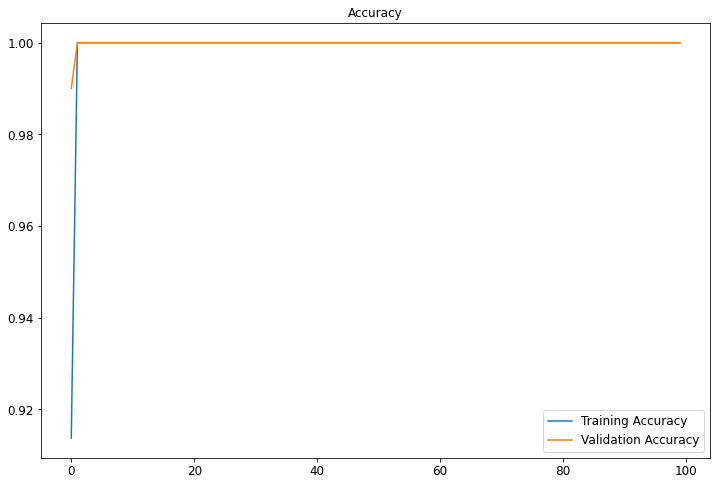

In [ ]:
## Visulize the Result
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right',fontsize=12)
plt.title('Accuracy',fontsize=12)

plt.show()

In [ ]:
# save the result to csv file
acc_df = pd.DataFrame(acc)
val_acc_df = pd.DataFrame(val_acc)
acc_df.to_csv('2_train_acc_lr0.1_mo0.8_SGD_100.csv', index = False) 
val_acc_df.to_csv('2_validate_acc_lr0.1_mo0.8_SGD_100.csv', index = False)

In [ ]:
# print out the accuracy
score_train = nn_model.evaluate(X_train, y_train, verbose=0)
score_vali = nn_model.evaluate(X_vali, y_vali, verbose=0)
score_test = nn_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy Score on Training data: {}".format(score_train[1]))
print("Accuracy Score on Validating data: {}".format(score_vali[1]))
print("Accuracy Score on Testing data: {}".format(score_test[1]))

Accuracy Score on Training data: 1.0
Accuracy Score on Validating data: 1.0
Accuracy Score on Testing data: 1.0


In [ ]:
# save the result to csv file
y_pred_vali_nn = nn_model.predict_classes(X_vali)
y_pred_train_nn = nn_model.predict_classes(X_train)
y_pred_test_nn = nn_model.predict_classes(X_test)
y1 = pd.DataFrame(y_train, columns=['y_true(train)'])
y2 = pd.DataFrame(y_pred_train_nn, columns=['y_predict(train)'])
y3 = pd.DataFrame(y_vali, columns=['y_true(validate)'])
y4 = pd.DataFrame(y_pred_vali_nn, columns=['y_predict(validate)'])
y5 = pd.DataFrame(y_test, columns=['y_true(test)'])
y6 = pd.DataFrame(y_pred_test_nn, columns=['y_predict(test)'])
Ytrain = pd.concat( [y1,y2], axis=1 )
Yvali = pd.concat( [y3,y4], axis=1 )
Ytest = pd.concat( [y5,y6], axis=1 )
Ytrain.to_csv('2_train_result_lr0.1_mo0.8_SGD_100.csv', index = False) 
Yvali.to_csv('2_vali_result_lr0.1_mo0.8_SGD_100.csv', index = False)
Ytest.to_csv('2_test_result_lr0.1_mo0.8_SGD_100.csv', index = False)